In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd 'drive/My Drive/Siamese/Place'

/content/drive/My Drive/Siamese/Place


In [ ]:
import sys
sys.path.insert(0, '../Data')
sys.path.insert(0, '../Encoder')
sys.path.insert(0, '../Encoder/Freq')
sys.path.insert(0, '../Encoder/Time')
sys.path.insert(0, '../Speaker')
sys.path.insert(0, '../Conference')
sys.path.insert(0, '..')
sys.path.insert(0, '..')
sys.path.insert(0, '../Place')

In [ ]:
!pip install torchaudio

In [ ]:
import os
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

from tqdm import tqdm

In [ ]:
DATASET_PATH = '/content/drive/My Drive/DataSet'
EPOCH_NUM = 6

torch.backends.cudnn.deterministic = True

NUM_WORKERS = 4

In [ ]:
from IdentificationDataset import IdentificationDataset
from IdentificationDataset import ReturnType
from torchvision.transforms import Compose

from Normalize import Normalize
from ToTensor import ToTensor

DATASET_PATH = '/content/drive/My Drive/DataSet'

transforms = Compose([
    Normalize(),
    ToTensor()
])

NUM_CLASSES = 40

trainset = IdentificationDataset(DATASET_PATH, 
                                 NUM_CLASSES,
                                 encode=False,
                                 train=True, 
                                 transform=transforms,
                                 lenght=3,
                                 return_type=ReturnType.STANDARD)
trainsetloader = torch.utils.data.DataLoader(trainset, 
                                             batch_size=1, 
                                             num_workers=NUM_WORKERS, 
                                             shuffle=True)

testset = IdentificationDataset(DATASET_PATH, 
                                NUM_CLASSES,
                                encode=False,
                                train=False, 
                                transform=transforms,
                                lenght=3,
                                return_type=ReturnType.STANDARD)

testsetloader = torch.utils.data.DataLoader(testset, 
                                            batch_size=1, 
                                            num_workers=NUM_WORKERS)

print("lenght test loader ", len(testsetloader))


sample lenght  3
sample lenght  3
lenght test loader  513


In [ ]:
from Conference import Conference

# Define default device, we should use the GPU (cuda) if available
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
net = Conference(DEVICE, time=False)
net.to(DEVICE)

Conference(
  (encoder): TransFourier(
    (spectrogram): Spectrogram()
    (amp): AmplitudeToDB()
    (block1): Conv2DBlock(
      (conv1): Conv2d(1, 32, kernel_size=(1, 1), stride=(2, 1))
      (conv2): Conv2d(1, 96, kernel_size=(7, 7), stride=(2, 1), padding=(3, 3))
      (bn): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (maxpool): MaxPool2d(kernel_size=(4, 4), stride=(4, 4), padding=0, dilation=1, ceil_mode=False)
    )
    (block2): Conv2DBlock(
      (conv1): Conv2d(128, 64, kernel_size=(1, 1), stride=(2, 1))
      (conv2): Conv2d(128, 192, kernel_size=(5, 5), stride=(2, 1), padding=(2, 2))
      (bn): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU()
      (maxpool): MaxPool2d(kernel_size=(4, 2), stride=(4, 2), padding=0, dilation=1, ceil_mode=False)
    )
    (block3): Conv2DBlock(
      (conv1): Conv2d(256, 64, kernel_size=(1, 1), stride=(2, 1))
      (conv2): Co

In [ ]:
with torch.no_grad():
  # test
  net.eval()
  # Store the places
  speakers_list = testset.get_speakers_list(20)
  net.load_encoder()
  net.initspeakers(speakers_list)  
  net.initplaces(speakers_list, maxsize=2)

Encoder loaded


*** Epoch  0  ***
*** Train ***


4361it [02:59, 24.26it/s]

accuracy mean  0.22609493235496445 topk 0.4897959183673469  min  0.5012611786287549
Error  0.5102040816326531
{270: 33, 272: 64, 273: 71, 274: 52, 275: 40, 276: 36, 277: 96, 278: 29, 271: 67, 279: 90, 280: 55, 281: 69, 282: 83, 283: 52, 285: 86, 284: 60, 286: 19, 287: 86, 288: 52, 289: 16, 290: 57, 291: 16, 292: 32, 293: 71, 294: 40, 295: 47, 296: 61, 297: 77, 298: 42, 299: 87, 300: 20, 301: 62, 302: 69, 303: 17, 304: 72, 305: 79, 306: 28, 307: 65, 308: 65, 309: 43}
*** Test ***



513it [00:17, 28.98it/s]


accuracy final_mean  0.9298245614035088  final_min  0.9005847953216374


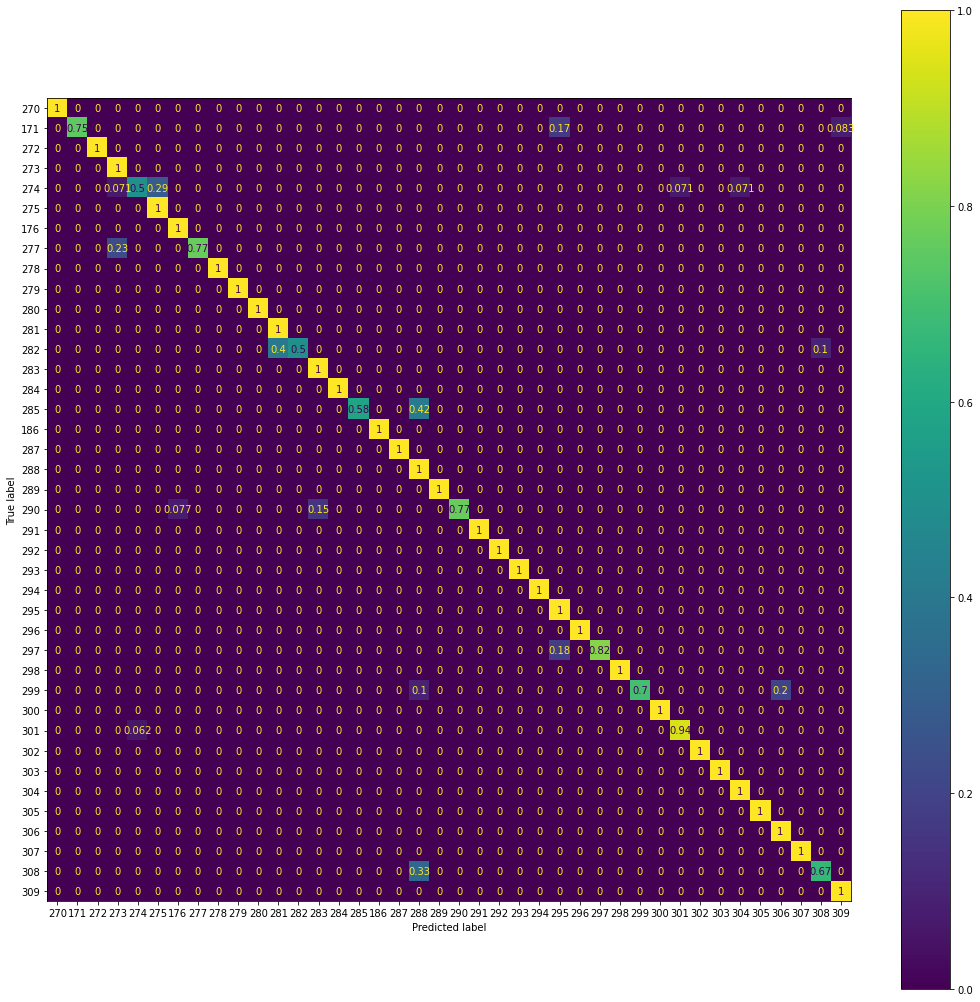

*** Epoch  1  ***
*** Train ***


4361it [03:02, 23.91it/s]

accuracy mean  0.4923182756248567 topk 0.6441183214858978  min  0.6282962623251548
Error  0.3558816785141023
{270: 36, 272: 64, 273: 36, 274: 50, 275: 19, 276: 46, 277: 48, 278: 29, 271: 52, 279: 47, 280: 86, 281: 49, 282: 37, 283: 46, 285: 46, 284: 24, 286: 13, 287: 52, 288: 38, 289: 16, 290: 26, 291: 13, 292: 25, 293: 52, 294: 16, 295: 50, 296: 55, 297: 44, 298: 16, 299: 38, 300: 21, 301: 40, 302: 73, 303: 5, 304: 31, 305: 46, 306: 16, 307: 31, 308: 59, 309: 23}
*** Test ***



513it [00:18, 28.20it/s]


accuracy final_mean  0.9512670565302144  final_min  0.9181286549707602


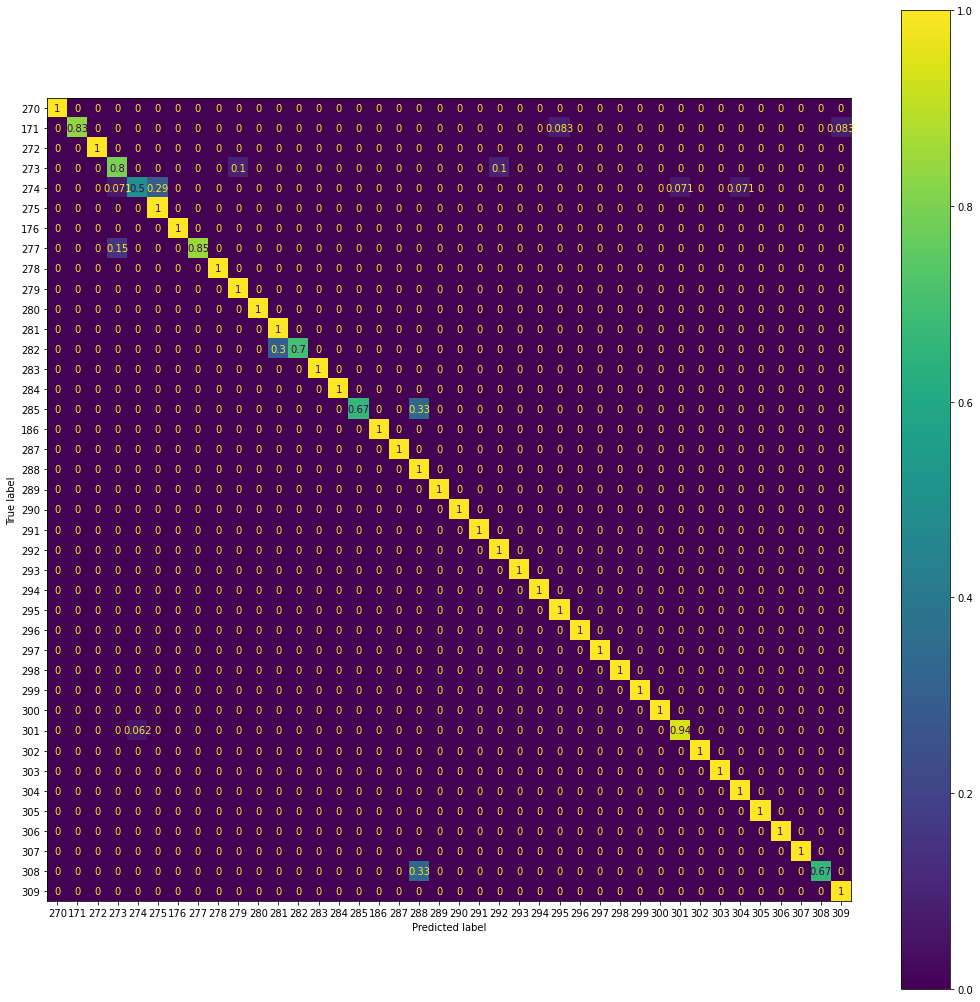

*** Epoch  2  ***
*** Train ***


4361it [03:01, 24.01it/s]

accuracy mean  0.5673010777344646 topk 0.6794313230910342  min  0.6466406787434075
Error  0.32056867690896584
{270: 28, 272: 53, 273: 43, 274: 30, 275: 19, 276: 41, 277: 25, 278: 31, 271: 32, 279: 29, 280: 75, 281: 36, 282: 18, 283: 48, 285: 28, 284: 22, 286: 15, 287: 23, 288: 27, 289: 13, 290: 21, 291: 13, 292: 30, 293: 47, 294: 13, 295: 55, 296: 54, 297: 25, 298: 13, 299: 20, 300: 25, 301: 28, 302: 70, 303: 3, 304: 32, 305: 31, 306: 16, 307: 34, 308: 36, 309: 21}
*** Test ***



513it [00:18, 27.62it/s]


accuracy final_mean  0.9434697855750487  final_min  0.9025341130604289


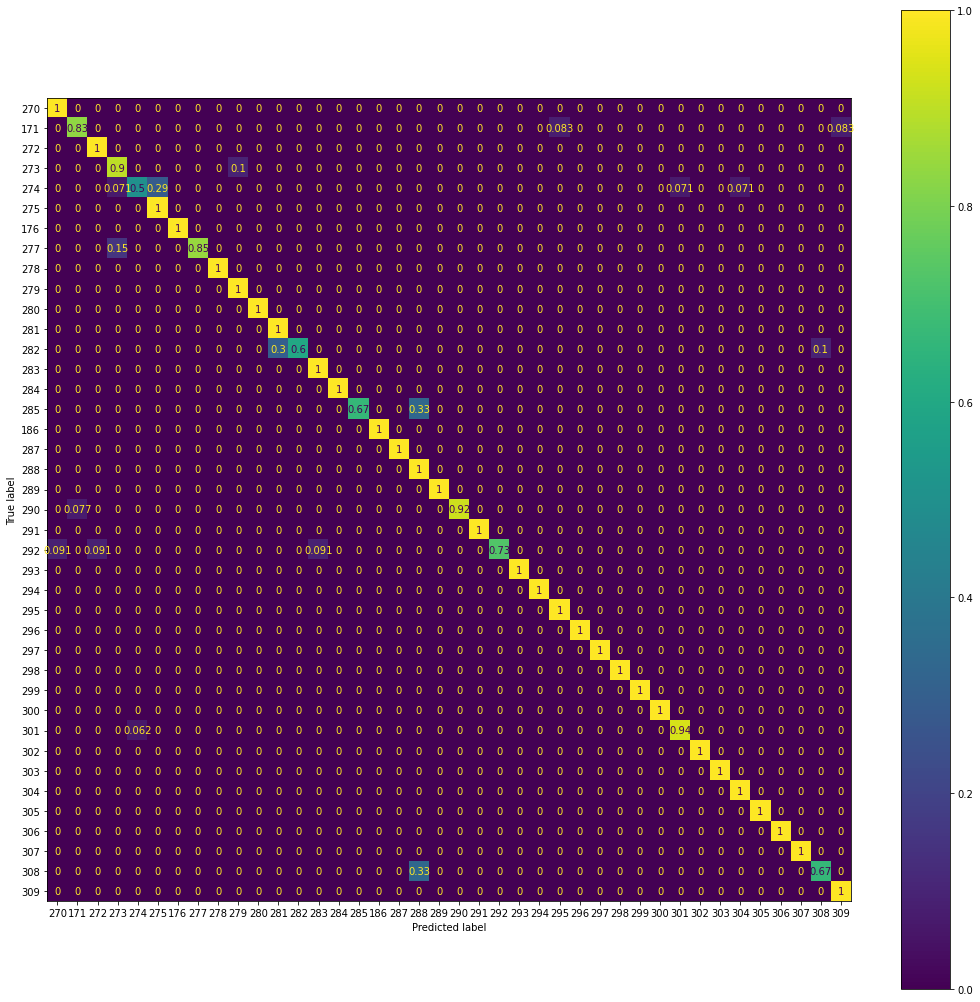

*** Epoch  3  ***
*** Train ***


4361it [03:02, 23.93it/s]

accuracy mean  0.5952763127723 topk 0.6723228617289613  min  0.6487044255904609
Error  0.3276771382710387
{270: 29, 272: 46, 273: 39, 274: 17, 275: 22, 276: 41, 277: 25, 278: 30, 271: 36, 279: 25, 280: 78, 281: 42, 282: 12, 283: 47, 285: 30, 284: 20, 286: 13, 287: 23, 288: 33, 289: 13, 290: 26, 291: 13, 292: 37, 293: 43, 294: 20, 295: 64, 296: 60, 297: 29, 298: 14, 299: 17, 300: 26, 301: 31, 302: 72, 303: 5, 304: 31, 305: 32, 306: 16, 307: 30, 308: 32, 309: 26}
*** Test ***



513it [00:17, 28.97it/s]


accuracy final_mean  0.9298245614035088  final_min  0.8888888888888888


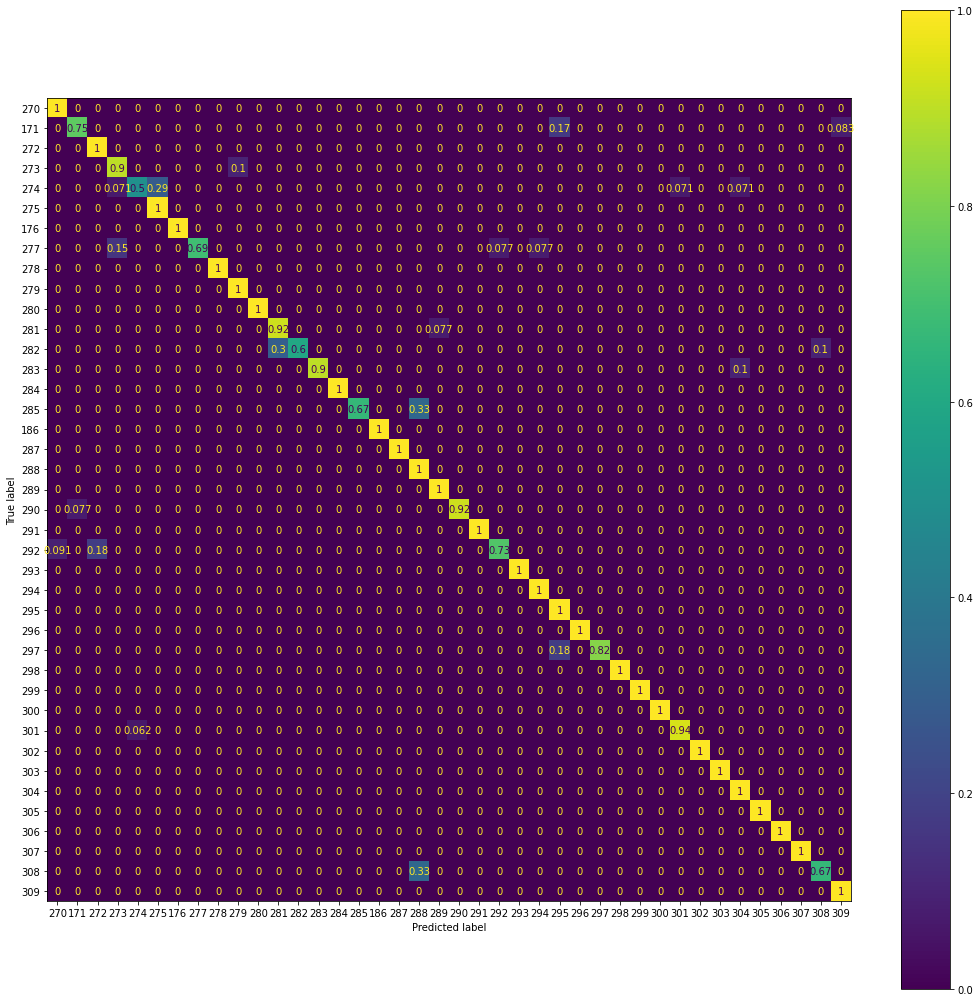

*** Epoch  4  ***
*** Train ***


4361it [03:03, 23.75it/s]

accuracy mean  0.6124742031644118 topk 0.6741573033707865  min  0.6461820683329511
Error  0.3258426966292135
{270: 32, 272: 43, 273: 38, 274: 22, 275: 11, 276: 40, 277: 25, 278: 31, 271: 29, 279: 25, 280: 76, 281: 40, 282: 18, 283: 49, 285: 35, 284: 24, 286: 16, 287: 21, 288: 27, 289: 13, 290: 21, 291: 16, 292: 40, 293: 36, 294: 19, 295: 60, 296: 53, 297: 35, 298: 14, 299: 17, 300: 24, 301: 31, 302: 70, 303: 3, 304: 33, 305: 34, 306: 16, 307: 35, 308: 28, 309: 23}
*** Test ***



513it [00:18, 28.35it/s]


accuracy final_mean  0.9044834307992202  final_min  0.8771929824561403


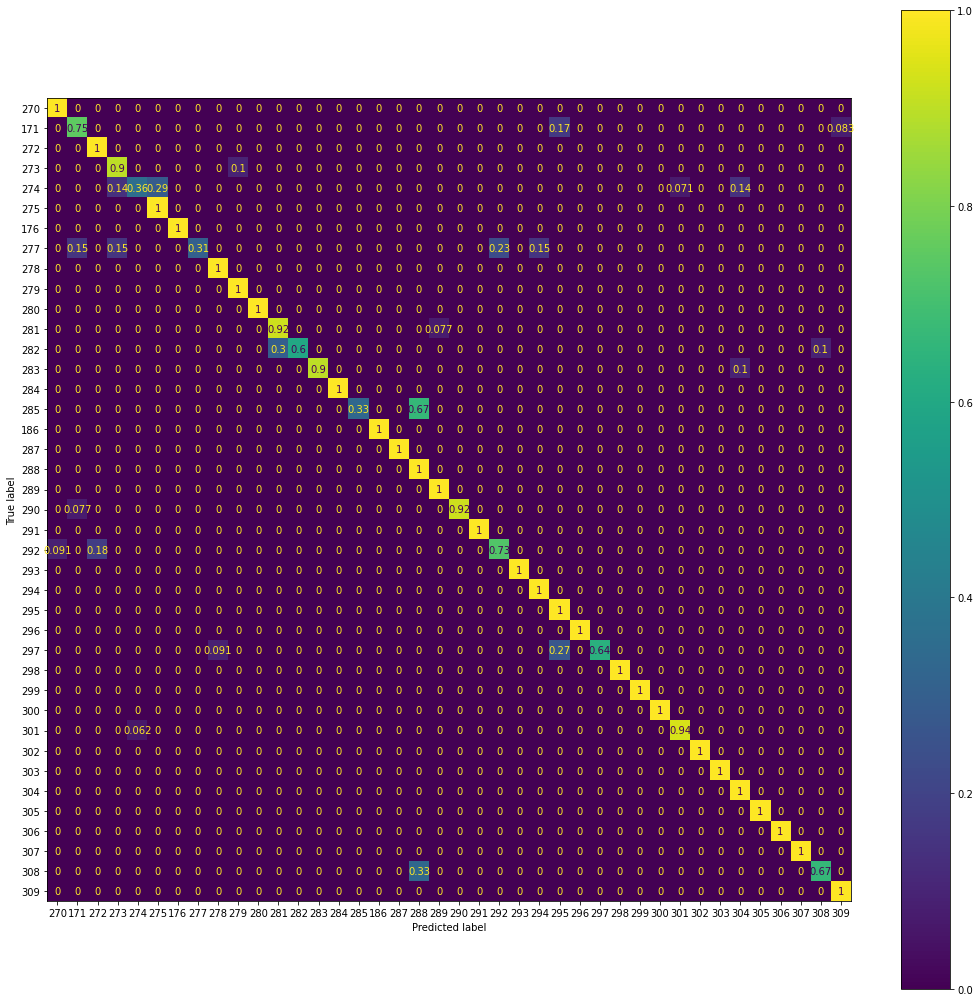

*** Epoch  5  ***
*** Train ***


4361it [03:01, 24.01it/s]

accuracy mean  0.6250859894519606 topk 0.6741573033707865  min  0.6422838798440724
Error  0.3258426966292135
{270: 30, 272: 46, 273: 40, 274: 22, 275: 19, 276: 37, 277: 20, 278: 29, 271: 31, 279: 21, 280: 76, 281: 40, 282: 16, 283: 47, 285: 37, 284: 22, 286: 17, 287: 26, 288: 36, 289: 13, 290: 20, 291: 15, 292: 37, 293: 43, 294: 19, 295: 64, 296: 55, 297: 35, 298: 18, 299: 12, 300: 27, 301: 25, 302: 66, 303: 5, 304: 34, 305: 34, 306: 14, 307: 35, 308: 26, 309: 25}
*** Test ***



513it [00:18, 28.40it/s]


accuracy final_mean  0.8947368421052632  final_min  0.8654970760233918


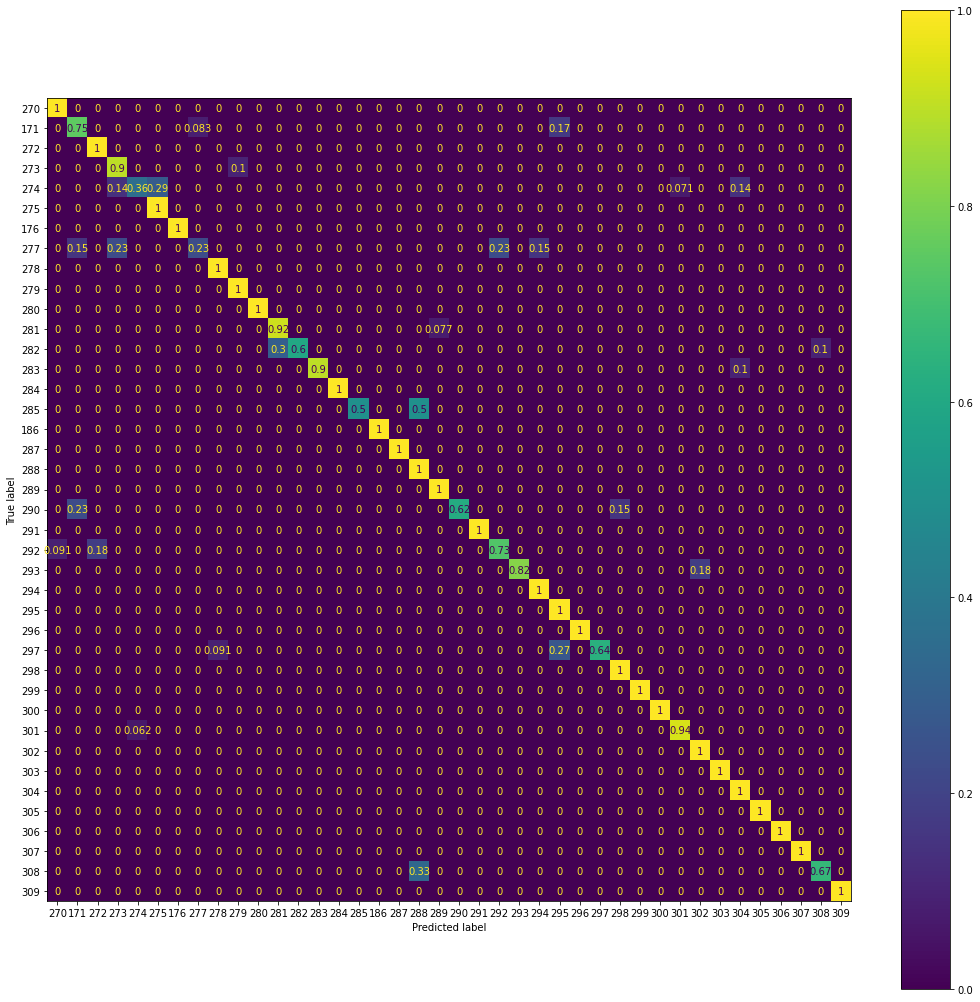

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

dict_error = {}
dict_nb = {}

conf_gold_label = None
conf_pred_label = None

with torch.no_grad():
  best_accuracy = 0
  mean_accuracies = []
  topk_accuracies = []
  min_accuracies = []
  final_mean_accuracies = []
  final_min_accuracies = []
  # Confusion matrix
  conf_gold_label = []
  conf_pred_label = []

  for epoch_num in range(EPOCH_NUM):
    print("*** Epoch ", epoch_num, " ***")
    # train
    print("*** Train ***")
    mean_accuracy = 0
    topk_accuracy = 0
    min_accuracy = 0
    nb_test = 0

    for speaker in speakers_list:
      id = speaker[0]
      dict_error[id] = 0
      dict_nb[id] = 0

    for iter_num, (gold_label, sample) in tqdm(enumerate(trainsetloader)):
      gold_label = gold_label.item()
      mean_label, topk_label, min_label = net(sample, gold_label)

      nb_test += 1
      dict_nb[gold_label] += 1

      if gold_label == mean_label:
        mean_accuracy += 1
      if gold_label == topk_label:
        topk_accuracy += 1
      else:
        dict_error[gold_label] += 1
      if gold_label == min_label:
        min_accuracy += 1

    mean_accuracy /= nb_test
    topk_accuracy /= nb_test
    min_accuracy /= nb_test
    mean_accuracies.append(mean_accuracy)
    topk_accuracies.append(topk_accuracy)
    min_accuracies.append(min_accuracy)
    print("accuracy mean ", mean_accuracy, "topk", topk_accuracy, 
          " min ", min_accuracy)
    add = 0
    nb = 0
    for id in dict_error:
      add += dict_error[id]
      nb += dict_nb[id]
      dict_error[id] =  100 * dict_error[id]//dict_nb[id] 
    print("Error ", add/nb)
    print(dict_error)
    
    # test
    print("*** Test ***")
    final_mean_accuracy = 0
    final_min_accuracy = 0
    nb_test = 0
    conf_gold_label.clear()
    conf_pred_label.clear()

    for iter_num, (gold_label, sample) in tqdm(enumerate(testsetloader)):
      gold_label = gold_label.item()
      final_mean_label, final_min_label = net(sample, place_id=gold_label)
      conf_gold_label.append(gold_label)
      conf_pred_label.append(final_mean_label)      
      nb_test += 1
      dict_nb[gold_label] += 1

      if gold_label == final_mean_label:
        final_mean_accuracy += 1
      if gold_label == final_min_label:
        final_min_accuracy += 1

    final_mean_accuracy /= nb_test
    final_min_accuracy /= nb_test
    final_mean_accuracies.append(final_mean_accuracy)
    final_min_accuracies.append(final_min_accuracy)
    print("accuracy final_mean ", final_mean_accuracy, 
          " final_min ", final_min_accuracy)

    cm = confusion_matrix(conf_gold_label, conf_pred_label, normalize='true')
    fig, ax = plt.subplots(figsize=(18, 18))
    disp = ConfusionMatrixDisplay(cm, [270, 171, 272, 273, 274, 275, 176, 277, 278, 279, 280, 281, 282, 283, 284, 285, 186, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300 , 301, 302 , 303, 304 , 305, 306 , 307, 308, 309]).plot(ax=ax)
    plt.show()

  net.store_speakers(20, 3)

In [ ]:
print("maximum of min", round(np.max(min_accuracies), 3))
print("maximum of topk", round(np.max(topk_accuracies), 3))
print("maximum of mean", round(np.max(mean_accuracies), 3))
print("maximum of final mean", round(np.max(final_mean_accuracies), 3))
print("maximum of final min", round(np.max(final_min_accuracies), 3))

maximum of min 0.649
maximum of topk 0.679
maximum of mean 0.625
maximum of final mean 0.951
maximum of final min 0.918


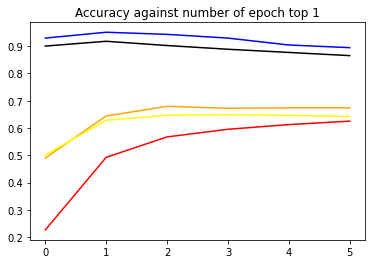

In [ ]:
import matplotlib.pyplot as plt

plt.title("Accuracy against number of epoch top 1")
plt.plot([i for i in range(EPOCH_NUM)], mean_accuracies , label='test 1', color='red')
plt.plot([i for i in range(EPOCH_NUM)], topk_accuracies , label='test 1', color='orange')
plt.plot([i for i in range(EPOCH_NUM)], min_accuracies , label='test 1', color='yellow')
plt.plot([i for i in range(EPOCH_NUM)], final_mean_accuracies , label='test 1', color='blue')
plt.plot([i for i in range(EPOCH_NUM)], final_min_accuracies , label='test 1', color='black')